<h1><b>Importing Required Modules

In [143]:
import tensorflow
import matplotlib.pyplot as plt
# import visualkeras as visual
# from collections import defaultdict
import tensorflow as tf
from tensorflow.keras import layers, losses, models
# from keras.utils import plot_model
import os
from tensorflow.keras.callbacks import TensorBoard
import numpy

<h1><b>Loading Data

In [144]:
# Loading the data: MNIST Handwritten Digits

(X_train, X_test), (X_test,y_test) = tensorflow.keras.datasets.mnist.load_data()

In [145]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [146]:
X_train, X_val = X_train[:-10000], X_train[:-10000]

In [147]:
X_train = X_train.astype('float32')/255.0
X_test = X_test.astype('float32')/255.0
X_val = X_val.astype('float32')/255.0

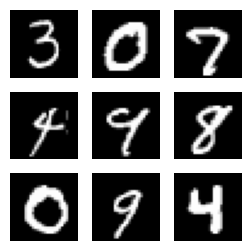

In [148]:
plt.figure(figsize=(3, 3))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(X_train[i+50].reshape(28, 28), cmap='gray')
    plt.axis('off')
plt.show()


<h1><b>Defining Encoder and Decoder Architectures

In [149]:
# from tensorflow.keras import models
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Flatten, Reshape, Conv2D, Conv2DTranspose

# IMAGE_SIZE = 784  # 28x28 images
# INPUT_SHAPE = (28, 28, 1)

# def make_encoder():
#     encoder = Sequential([
#       Conv2D(128, (3, 3), activation='relu', input_shape=INPUT_SHAPE),
#       Conv2D(64, (3, 3), activation='relu'),
#       Flatten(),
#       Dense(32, activation='sigmoid', name='vis')
#     ])
#     return encoder

# def make_decoder():
#     decoder = Sequential([
#         Dense(64 * 7 * 7, activation='relu', input_shape=(32,)),
#         Reshape((7, 7, 64)),
#         Conv2DTranspose(64, (3, 3), activation='relu', strides=(2, 2), padding='same'),
#         Conv2DTranspose(128, (3, 3), activation='relu', strides=(2, 2), padding='same'),
#         Conv2DTranspose(1, (3, 3), activation='sigmoid', padding='same')
#     ])
#     return decoder

In [150]:
from tensorflow.keras import models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Reshape, Conv2D, Conv2DTranspose
from keras import regularizers

IMAGE_SIZE = 784  # 28x28 images
INPUT_SHAPE = (28, 28, 1)
shape = X_test.shape[1:]

def make_encoder():
    encoder = Sequential([
      layers.Flatten(),
      layers.Dense(32, activity_regularizer=regularizers.l1(10e-5), activation='relu'),
    ])
    return encoder

def make_decoder():
    decoder = Sequential([
      layers.Dense(tf.math.reduce_prod(shape), activation='sigmoid'),
      layers.Reshape(shape)
    ])
    return decoder

In [151]:
print(shape)

(28, 28)


In [152]:
encoder = make_encoder()
decoder = make_decoder()

In [153]:
autoencoder = models.Sequential([encoder,
                                 decoder])

In [154]:
autoencoder.compile(optimizer='adam',
                    loss=losses.MeanSquaredError())

<h1><b>Training Autoencoder

In [155]:
!pip install tensorboard

In [156]:
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [157]:
import os
logdir = "/content/logs/"

In [158]:
tensorboard = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

In [159]:
autoencoder.fit(X_train, X_train,
                epochs=10,
                shuffle=True,
                validation_data=(X_test, X_test),
                callbacks=[tensorboard])

Epoch 1/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.0412 - val_loss: 0.0253
Epoch 2/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.0220 - val_loss: 0.0193
Epoch 3/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.0186 - val_loss: 0.0174
Epoch 4/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.0172 - val_loss: 0.0164
Epoch 5/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.0164 - val_loss: 0.0157
Epoch 6/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.0158 - val_loss: 0.0152
Epoch 7/10
1563/1563 [==============================] - 4s 3ms/step - loss: 0.0154 - val_loss: 0.0149
Epoch 8/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.0151 - val_loss: 0.0146
Epoch 9/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.0148 - val_loss: 0.0144
Epoch 10/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.0

<h1><b>Visualising Results

In [160]:
# %tensorboard --logdir logs

In [161]:
encoded_imgs = encoder(X_test).numpy()
decoded_imgs = decoder(encoded_imgs).numpy()

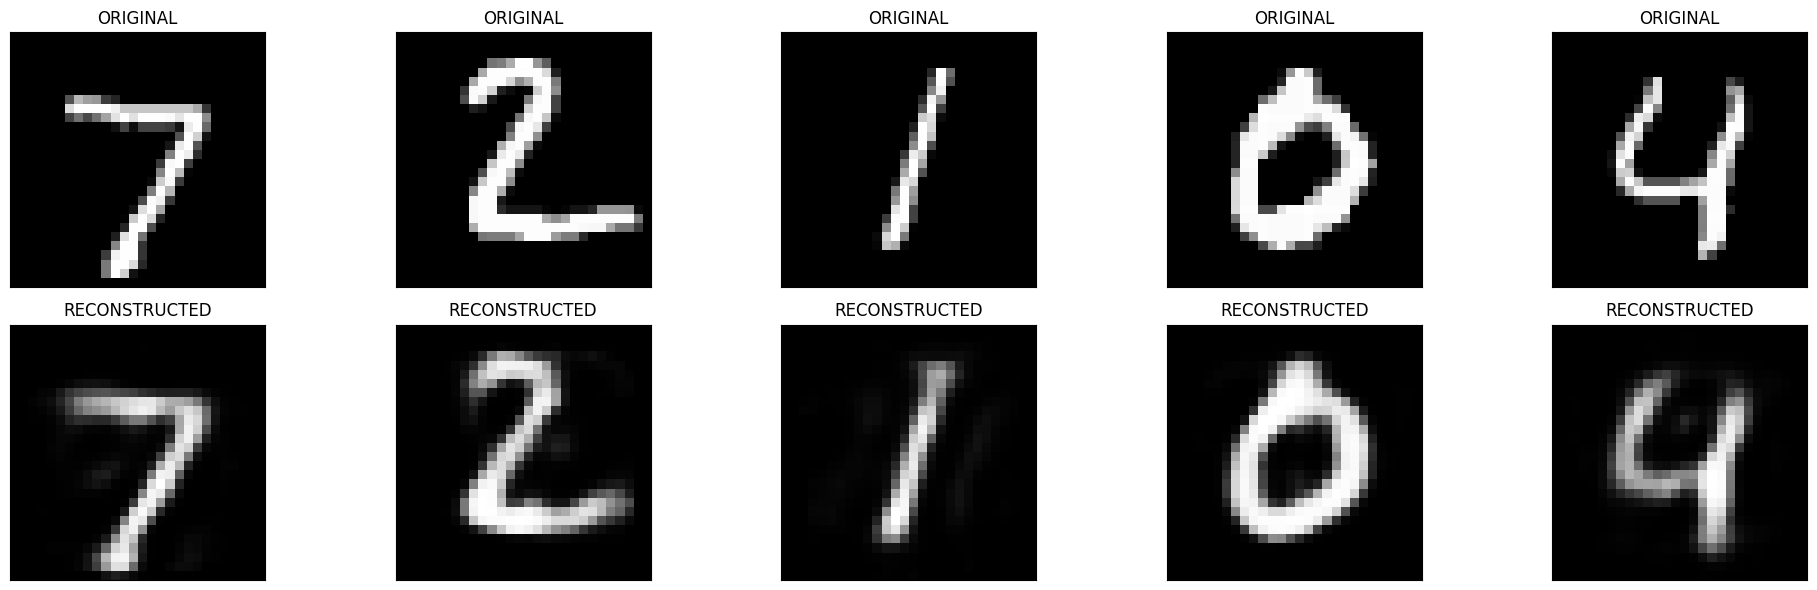

In [162]:
n = 5
plt.figure(figsize=(20, 6))
for i in range(n):
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(X_test[i])
  plt.title("ORIGINAL")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  ax = plt.subplot(2, n, i + 1 + n)
  plt.imshow(decoded_imgs[i])
  plt.title("RECONSTRUCTED")
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.tight_layout()
plt.show()

<h1><b>Testing

In [163]:
img = X_test[90]

In [164]:
img = img.reshape(1, 28, 28)

In [165]:
encoded_imgs = encoder(img).numpy()
decoded_imgs = decoder(encoded_imgs).numpy()


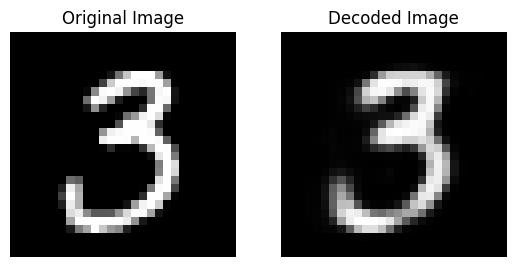

In [166]:
plt.subplot(1, 2, 1)
plt.imshow(img[0], cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(decoded_imgs[0], cmap='gray')
plt.title('Decoded Image')
plt.axis('off')

plt.show()


In [167]:
import warnings
warnings.filterwarnings('ignore')

313/313 [==============================] - 0s 1ms/step


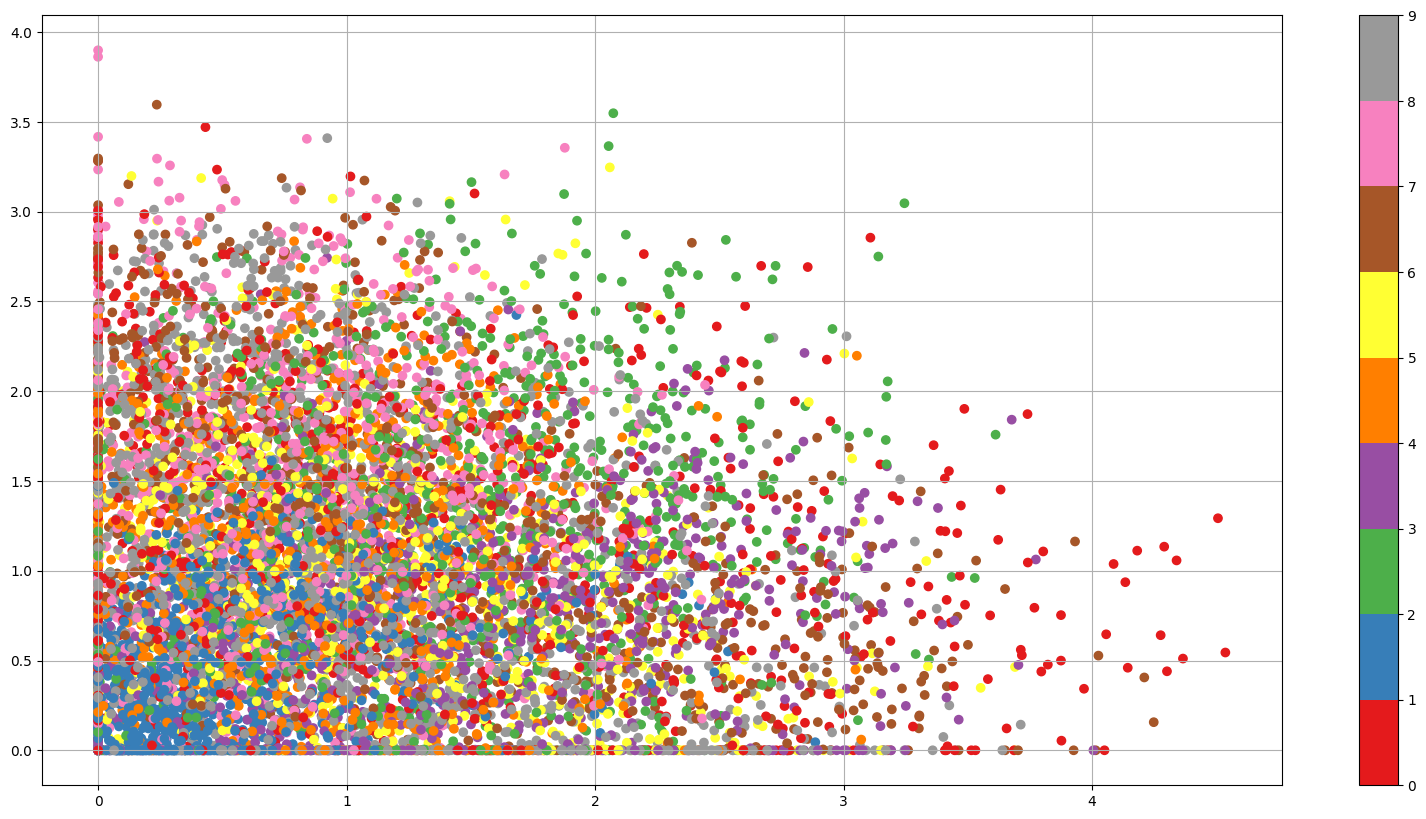

In [168]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

X_pred = encoder.predict(X_test)

plt.figure(figsize=(20, 10))
plt.scatter(X_pred[:, 0], X_pred[:, 1], c=y_test, cmap='Set1')
plt.colorbar()

plt.grid(which='both')

plt.show()


In [169]:
tf.keras.models.save_model(encoder, '/content/drive/MyDrive/prescient/Auto Encoders/encoder')
tf.keras.models.save_model(decoder, '/content/drive/MyDrive/prescient/Auto Encoders/decoder')
tf.keras.models.save_model(autoencoder, '/content/drive/MyDrive/prescient/Auto Encoders/autoencoder')